
# Chapter 8



# Lab: Tree-Based Methods
We import some of our usual libraries at this top
level.

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
#from ISLP import load_data, confusion_table
#from ISLP.models import ModelSpec as MS


We also  collect the new imports
needed for this lab.

In [2]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
#from ISLP.bart import BART


## Fitting Classification Trees

We first use classification trees to analyze the  `Carseats`  data set.
In these data, `Sales` is a continuous variable, and so we begin
by recoding it as a binary variable. We use the `where()` 
function to create a variable, called `High`, which takes on a
value of `Yes` if the `Sales` variable exceeds 8, and takes
on a value of `No` otherwise.

In [3]:
import os
os.chdir("C:\\Users\\noman\\My Drive\\BMGT7074_BA_2024 _sem2\\ISLP\My_work")
os.getcwd()

'C:\\Users\\noman\\My Drive\\BMGT7074_BA_2024 _sem2\\ISLP\\My_work'

In [11]:
Carseats = pd.read_csv('Carseats.csv')
Carseats

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

    Sales: The number of units sold.
    CompPrice: The price of the competition's product.
    Income: The average income of the local population.
    Advertising: The budget spent on advertising.
    Population: The population size of the area.
    Price: The price of the product.
    ShelveLoc: The quality of the shelving location ('Bad', 'Good', 'Medium').
    Age: The average age of the local population.
    Education: The education level in the area (likely an average or categorical measure).
    Urban: Whether the area is urban ('Yes') or not ('No').
    US: Whether the store is in the US ('Yes') or not ('No').

In [12]:
Carseats["High"] = np.where(Carseats.Sales > 8, "Yes", "No")
Carseats

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US High  
0           17   Yes  Yes  Yes  
1           10   Yes  Yes  Yes  
2           12   Yes  Yes  Yes  
3           14   Yes  Yes   No  
4           13   Yes   No   No  
..         ...   ...  ...  ...  
395         14   Yes  Yes  Yes  
396         11    No  Yes   No  
397         18   Yes  Yes   No  
398         12   Yes  Yes   No  
399         16   Yes  Yes  Yes  

[400 rows x 12 columns]

### Generic EDA _ noman

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

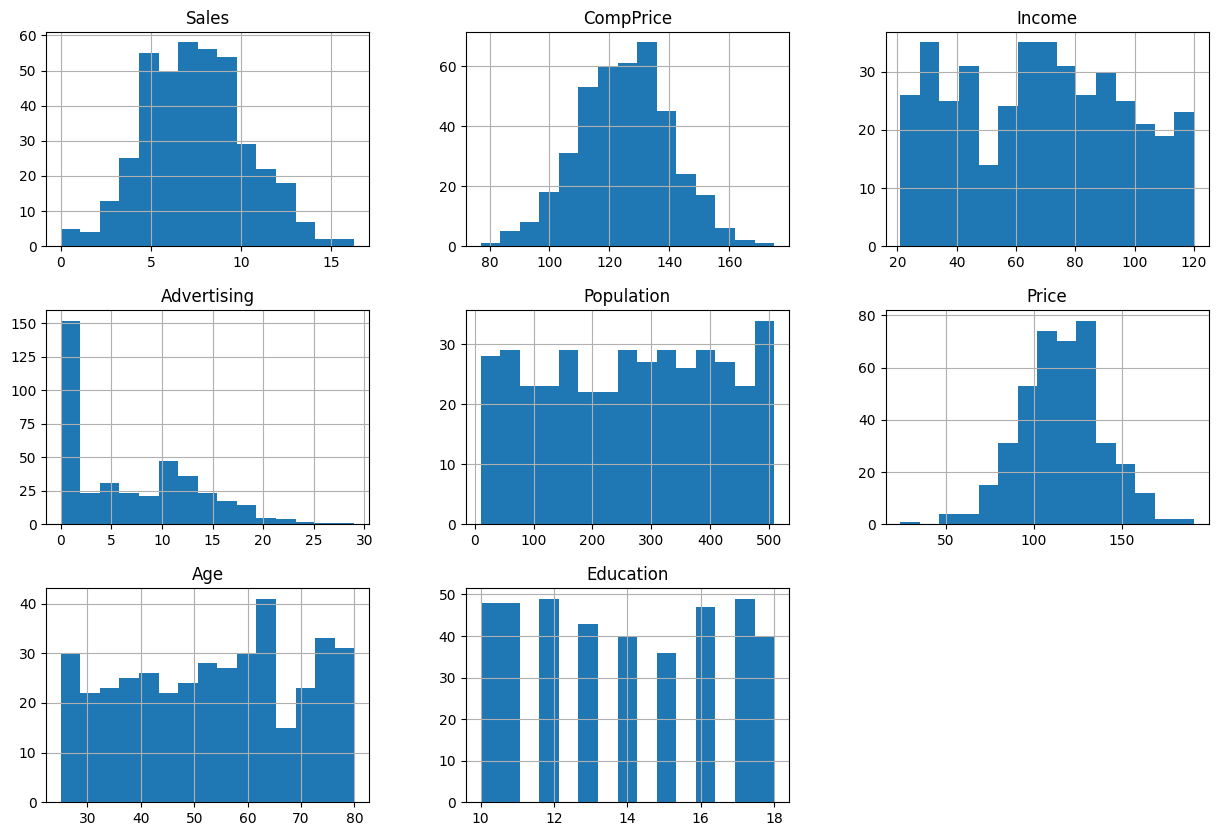

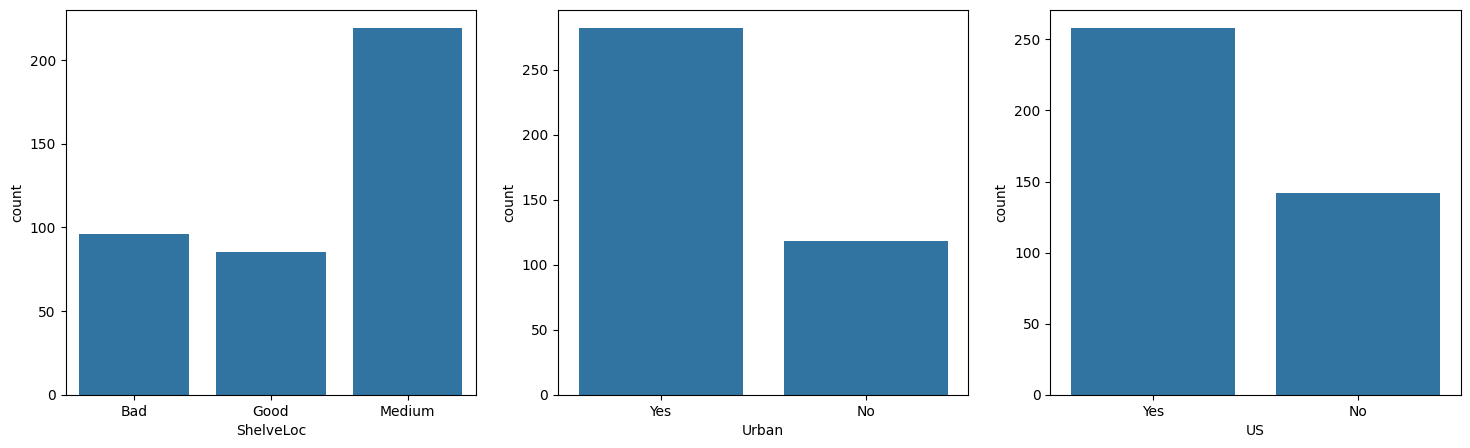

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame
# df.head() to check the first few rows

# Summary statistics for numerical variables
print(Carseats.describe())

# Frequency counts for categorical variables
for col in ['ShelveLoc', 'Urban', 'US', 'High']:
    print(Carseats[col].value_counts())

# Visualizations
# Histograms for numerical variables
Carseats.hist(bins=15, figsize=(15, 10))
plt.show()

# Bar charts for categorical variables
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(data=Carseats, x='ShelveLoc', ax=ax[0])
sns.countplot(data=Carseats, x='Urban', ax=ax[1])
sns.countplot(data=Carseats, x='US', ax=ax[2])
plt.show()



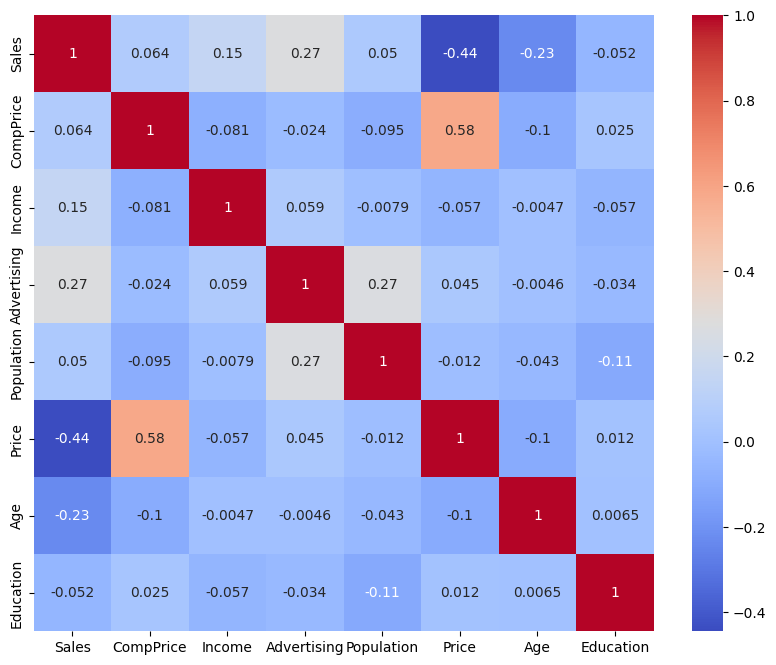

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
High           0
dtype: int64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'df' with 'Carseats' if your DataFrame variable is named Carseats

# Select only numerical variables
numerical_df = Carseats.select_dtypes(include=['float64', 'int64'])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Check for missing values
print(Carseats.isnull().sum())

### EDA to understand rel with High - Noman

In [25]:
# Assuming 'High' is your target variable in the DataFrame 'df'
print(Carseats['High'].value_counts())
print(Carseats['High'].value_counts(normalize=True))  # To see the proportion


High
No     236
Yes    164
Name: count, dtype: int64
High
No     0.59
Yes    0.41
Name: proportion, dtype: float64


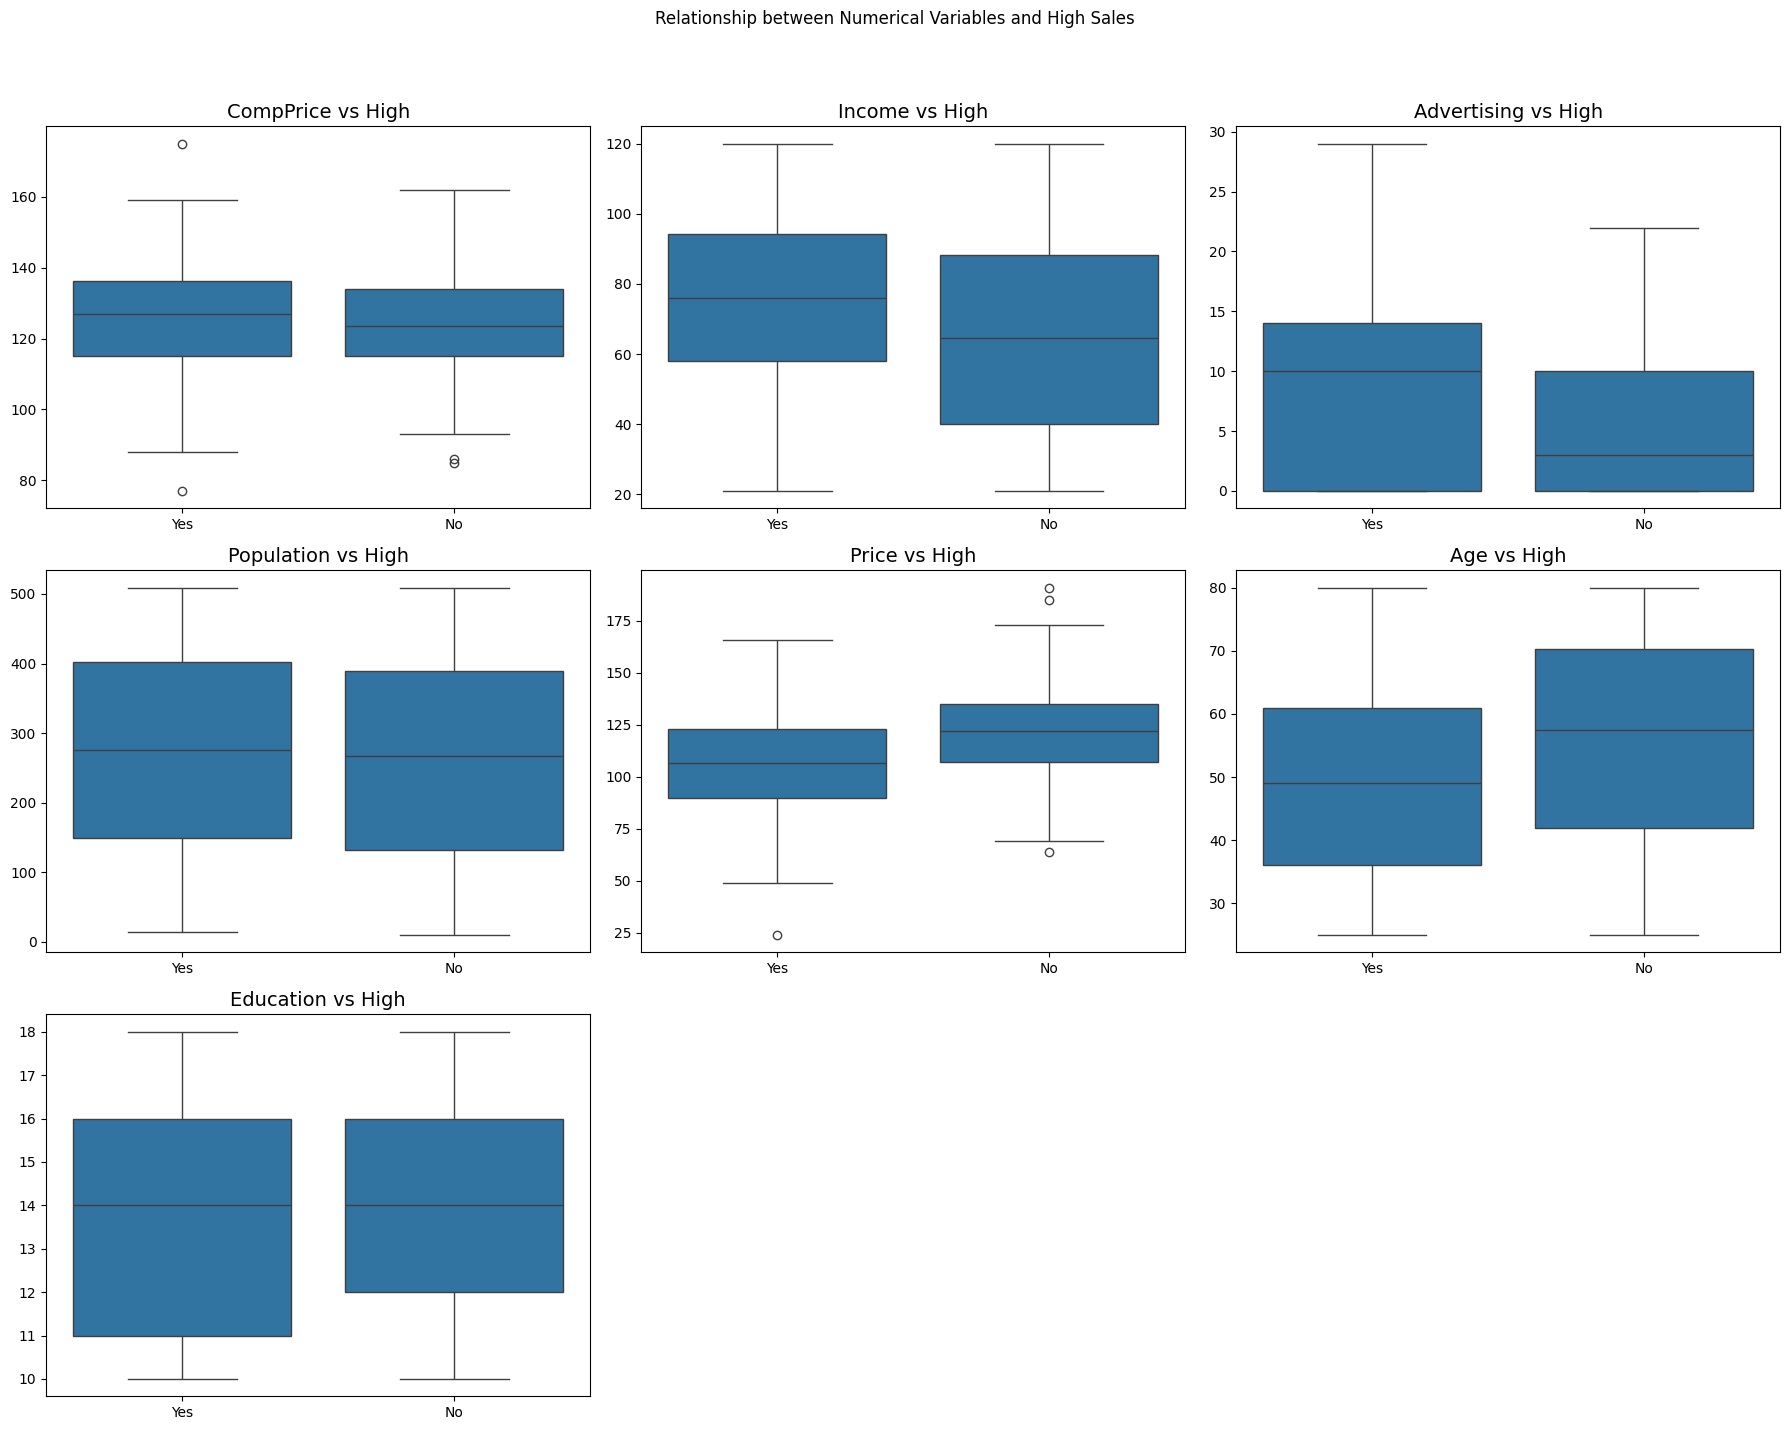

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables
numerical_vars = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

# Setting up the figure and axes for the 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15)) # Adjust the size as needed
fig.suptitle('Relationship between Numerical Variables and High Sales')

# Flattening the array of axes for easy iteration
axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    sns.boxplot(x='High', y=var, data=Carseats, ax=axes[i])
    axes[i].set_title(f'{var} vs High', fontsize=14)
    axes[i].set_xlabel('') # Remove x labels to declutter
    axes[i].set_ylabel('')

# If there are subplots without any plots (if len(numerical_vars) < 9), hide those axes
for ax in axes[len(numerical_vars):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust the layout to make room for the main title
plt.show()


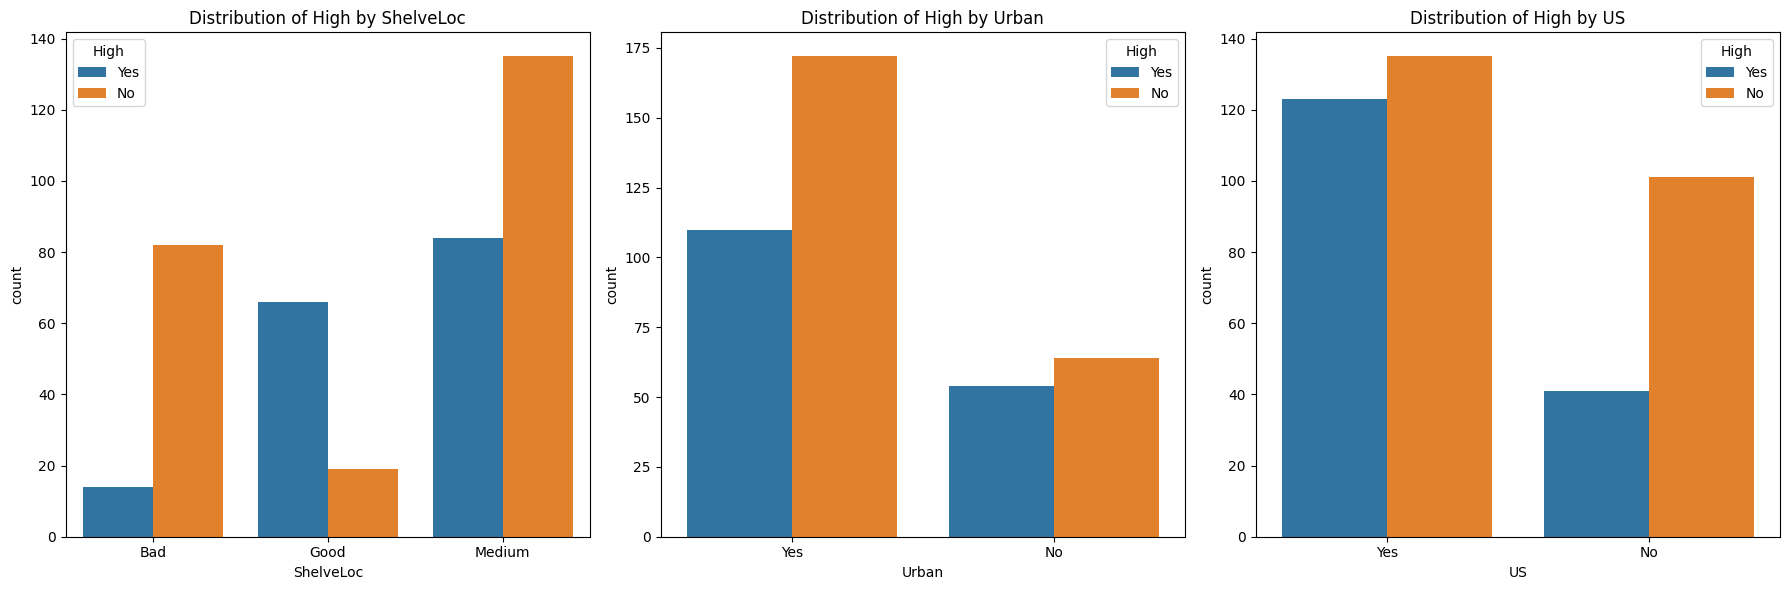

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your categorical variables
categorical_vars = ['ShelveLoc', 'Urban', 'US']

# Setting up the figure for the 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # Adjust the size as needed

# Manually creating each plot
sns.countplot(x='ShelveLoc', hue='High', data=Carseats, ax=axes[0])
axes[0].set_title('Distribution of High by ShelveLoc')

sns.countplot(x='Urban', hue='High', data=Carseats, ax=axes[1])
axes[1].set_title('Distribution of High by Urban')

sns.countplot(x='US', hue='High', data=Carseats, ax=axes[2])
axes[2].set_title('Distribution of High by US')

plt.tight_layout()  # Adjust the layout to make room for the titles
plt.show()


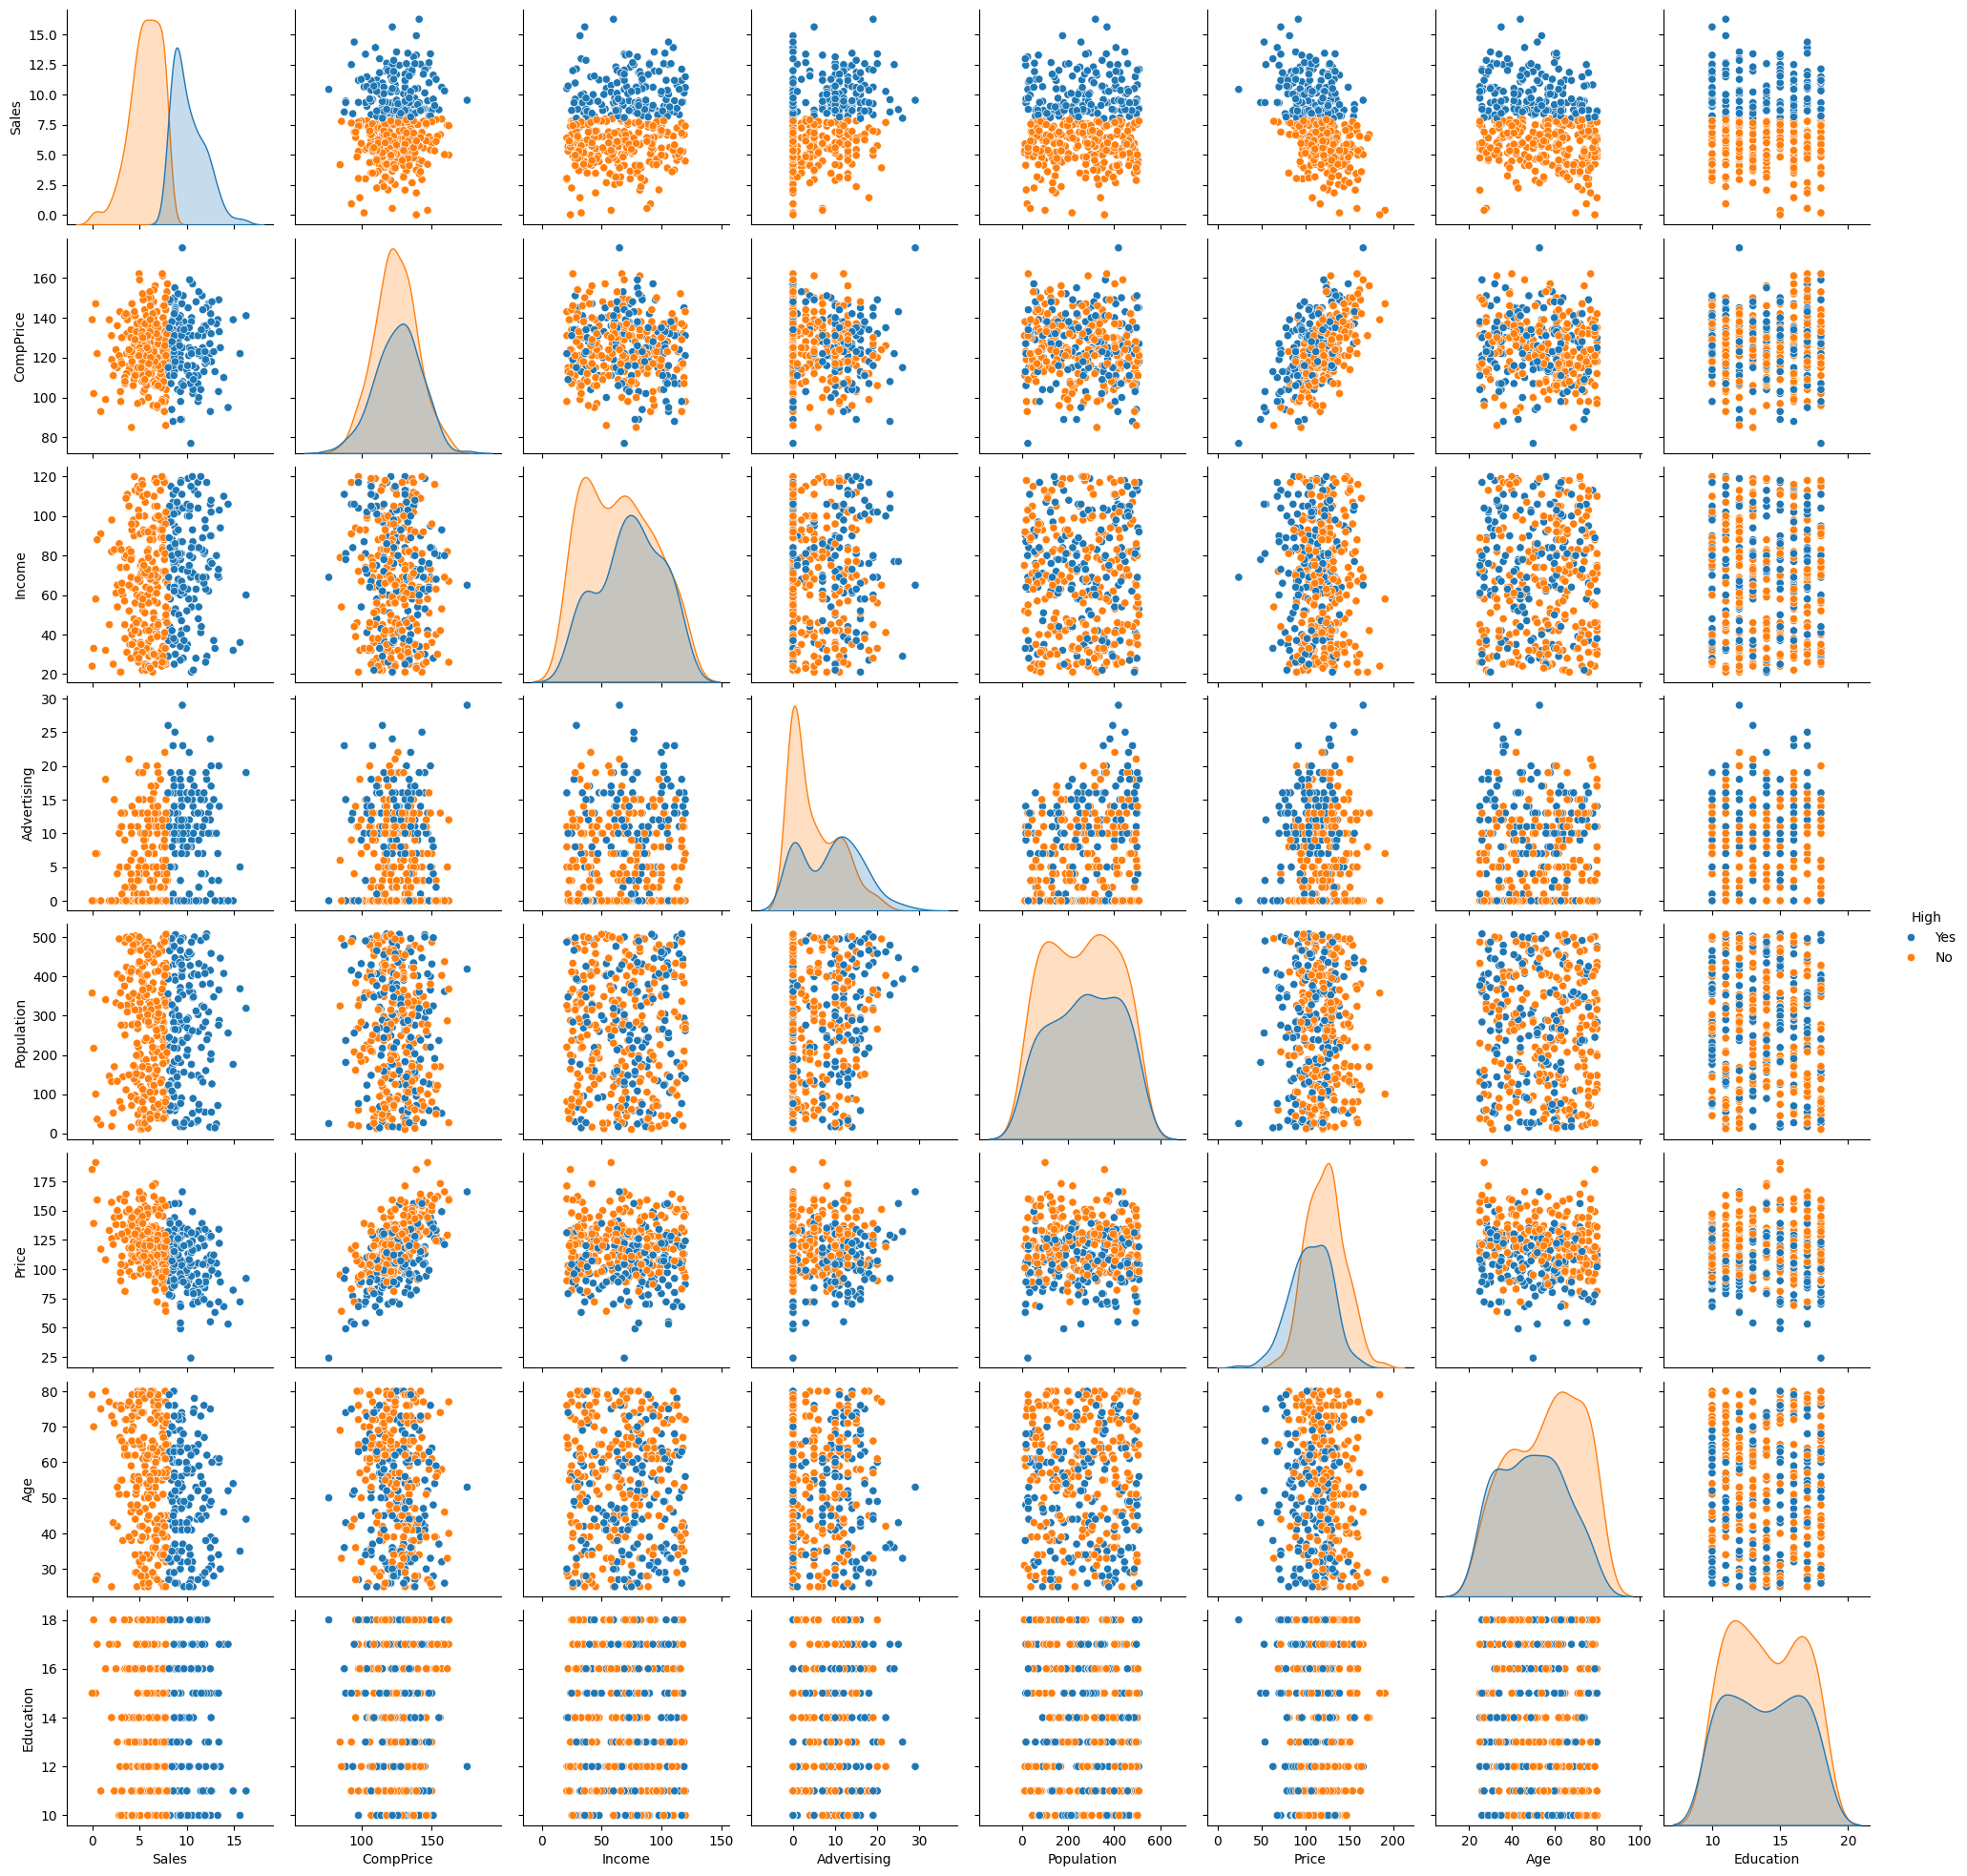

In [15]:
import seaborn as sns

# Assuming your DataFrame is named df
# It's a good practice to use a subset of your data for pair plots if you have many numerical variables, as pair plots can become less readable with too many variables.
numerical_vars = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
sns.pairplot(Carseats[numerical_vars + ['High']], hue='High')
plt.show()


We now use `DecisionTreeClassifier()`  to fit a classification tree in
order to predict `High` using all variables but `Sales`.
To do so, we must form a model matrix as we did when fitting regression
models.  

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [33]:

# Noman

# Assuming your DataFrame is named df and 'High' is your target variable
# Selecting predictors by dropping 'Sales' and target variable 'High'
X = Carseats.drop(['Sales', 'High'], axis=1)

# Encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first to avoid dummy variable trap

# Target variable
Y = Carseats['High']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Creating and fitting the Decision Tree model on the training dataset
# model = DecisionTreeClassifier(random_state=42)
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(Y_train, Y_train_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, Y_test_pred))


Training Accuracy: 0.771875
Test Accuracy: 0.7625

Confusion Matrix (Train Data):
[[177  16]
 [ 57  70]]

Confusion Matrix (Test Data):
[[35  8]
 [11 26]]


In [28]:
X_encoded

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0             False             False       True    True  
1              True             False       True    True  
2             False              True       True    True  
3             False              True       True    True  
4             False             False       True   False  
..              ...               ...        ...     ...  
395            True             False       True    True  
396           False              True      False    True  
397           False              True       True    True  
398           False             False       True    True  
399            True             False       True    True  

[400 rows x 11 columns]

In [4]:
# model = MS(Carseats.columns.drop('Sales'), intercept=False)
# D = model.fit_transform(Carseats)
# feature_names = list(D.columns)
# X = np.asarray(D)


We have converted `D` from a data frame to an array `X`, which is needed in some of the analysis below. We also need the `feature_names` for annotating our plots later.

There are several options needed to specify the  classifier,
such as `max_depth` (how deep to grow the tree), `min_samples_split`
(minimum number of observations in a node to be eligible for splitting)
and `criterion` (whether to use Gini or cross-entropy as the split criterion).
We also set `random_state` for reproducibility; ties in the split criterion are broken at random.

In [5]:
# clf = DTC(criterion='entropy',
#           max_depth=3,
#           random_state=0)        
# clf.fit(X, High)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In our discussion of qualitative features in Section 3.3,
we noted that for a linear regression model such a feature could be
represented by including a matrix of dummy variables (one-hot-encoding) in the model
matrix, using the formula notation of `statsmodels`.
As mentioned in Section 8.1, there is a more
natural way to handle qualitative features when building a decision
tree, that does not require such dummy variables; each split amounts to partitioning the levels into two groups.
However, 
the `sklearn` implementation of decision trees does not take
advantage of this approach; instead it simply treats the one-hot-encoded levels as separate variables.

In [6]:
# accuracy_score(High, clf.predict(X))


0.79

With only the default arguments, the training error rate is
21%.
For classification trees, we can
access the value of the deviance using `log_loss()`,
\begin{equation*}
\begin{split}
-2 \sum_m \sum_k n_{mk} \log \hat{p}_{mk},
\end{split}
\end{equation*}
where $n_{mk}$ is the number of observations in the $m$th terminal
node that belong to the $k$th class.

In [35]:
# resid_dev = np.sum(log_loss(Y_train, model.predict_proba(X)))
# resid_dev


from sklearn.metrics import log_loss

y_pred_proba = model.predict_proba(X_test)

# Calculate log loss (Lower is better)
log_loss_value = log_loss(Y_test, y_pred_proba)
print(f'Log Loss: {log_loss_value}')


Log Loss: 1.82794315946428


This is closely related to the *entropy*, defined in (8.7).
A small deviance indicates a
tree that provides a good fit to the (training) data.
 
One of the most attractive properties of trees is that they can
be graphically displayed. Here we use the `plot()`  function
to display the tree structure.

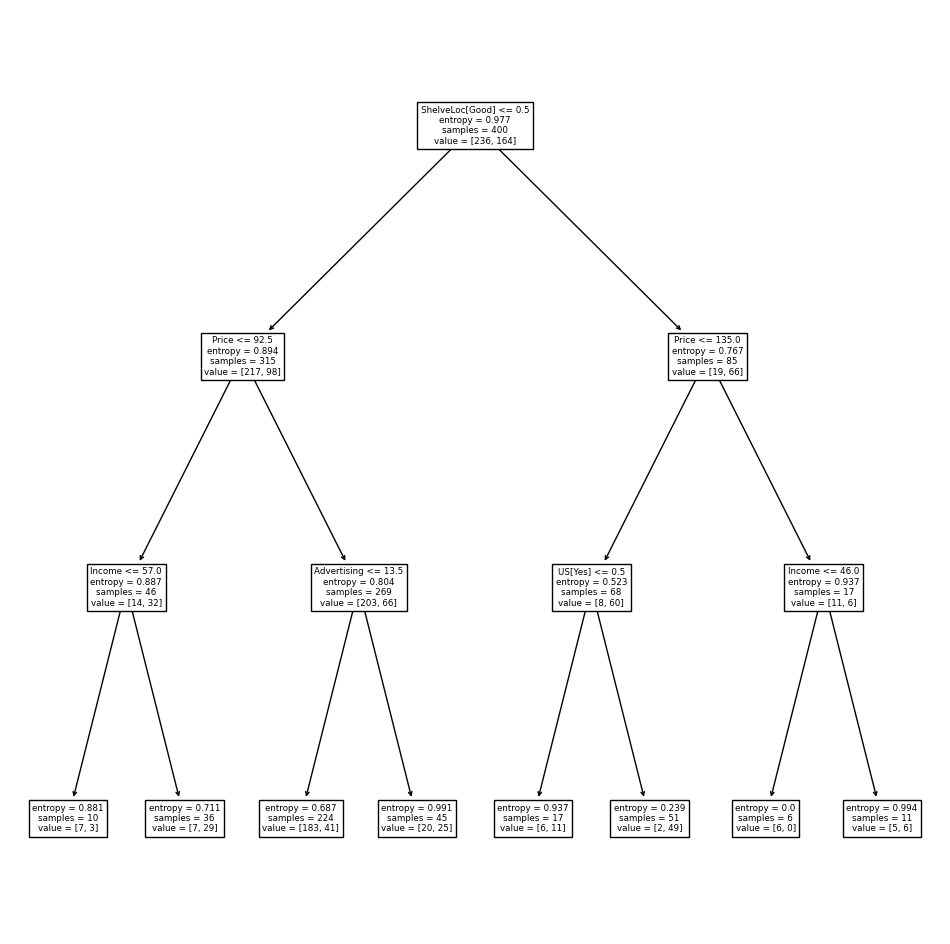

In [8]:
# ax = subplots(figsize=(12,12))[1]
# plot_tree(clf,
#           feature_names=feature_names,
#           ax=ax);


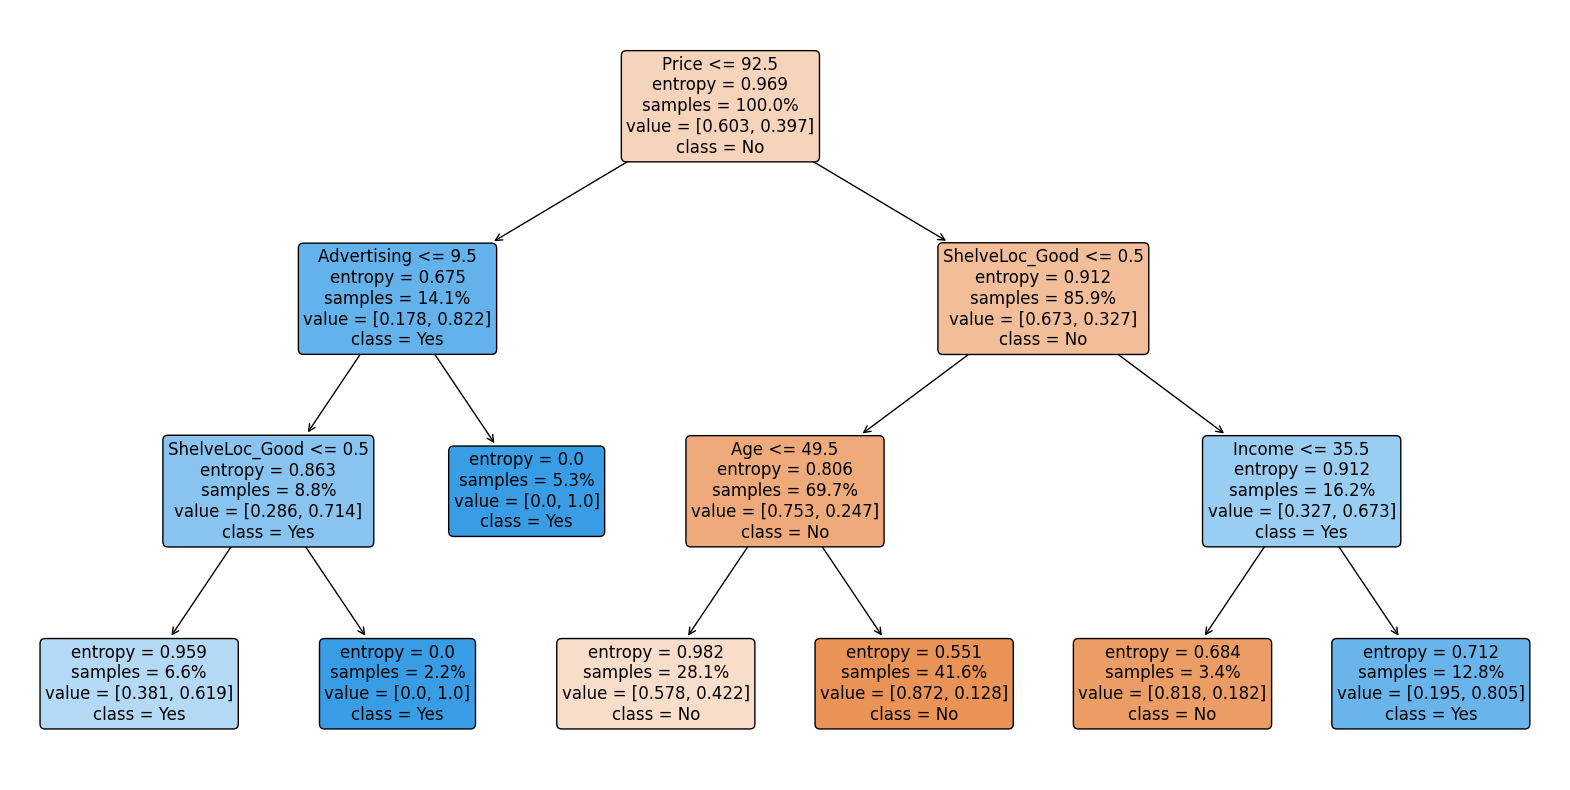

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X_encoded.columns, class_names=['No', 'Yes'], rounded=True, proportion=True, fontsize=12)
plt.show()


In [38]:

# Noman

# Assuming your DataFrame is named df and 'High' is your target variable
# Selecting predictors by dropping 'Sales' and target variable 'High'
X = Carseats.drop(['Sales', 'High'], axis=1)

# Encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first to avoid dummy variable trap

# Target variable
Y = Carseats['High']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Creating and fitting the Decision Tree model on the training dataset
# model = DecisionTreeClassifier(random_state=42)
# model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculating and printing performance metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))

print("\nConfusion Matrix (Train Data):")
print(confusion_matrix(Y_train, Y_train_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(Y_test, Y_test_pred))


Training Accuracy: 0.803125
Test Accuracy: 0.7125

Confusion Matrix (Train Data):
[[165  28]
 [ 35  92]]

Confusion Matrix (Test Data):
[[32 11]
 [12 25]]


In [50]:
conf_matrix_df = pd.DataFrame(confusion_matrix(Y_train, Y_train_pred), 
                              index=['Actual Down', 'Actual Up'], 
                              columns=['Predicted Down', 'Predicted Up'])

print(conf_matrix_df)

             Predicted Down  Predicted Up
Actual Down             165            28
Actual Up                35            92


In [54]:
tn, fp, fn, tp = confusion_matrix(Y_train, Y_train_pred).ravel()
# Calculating sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Printing sensitivity and specificity
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')


Sensitivity (Recall): 0.72
Specificity: 0.85


In [51]:
conf_matrix_df = pd.DataFrame(confusion_matrix(Y_test, Y_test_pred), 
                              index=['Actual Down', 'Actual Up'], 
                              columns=['Predicted Down', 'Predicted Up'])

print(conf_matrix_df)

             Predicted Down  Predicted Up
Actual Down              32            11
Actual Up                12            25


In [55]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_pred).ravel()
# Calculating sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Printing sensitivity and specificity
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Sensitivity (Recall): 0.68
Specificity: 0.74


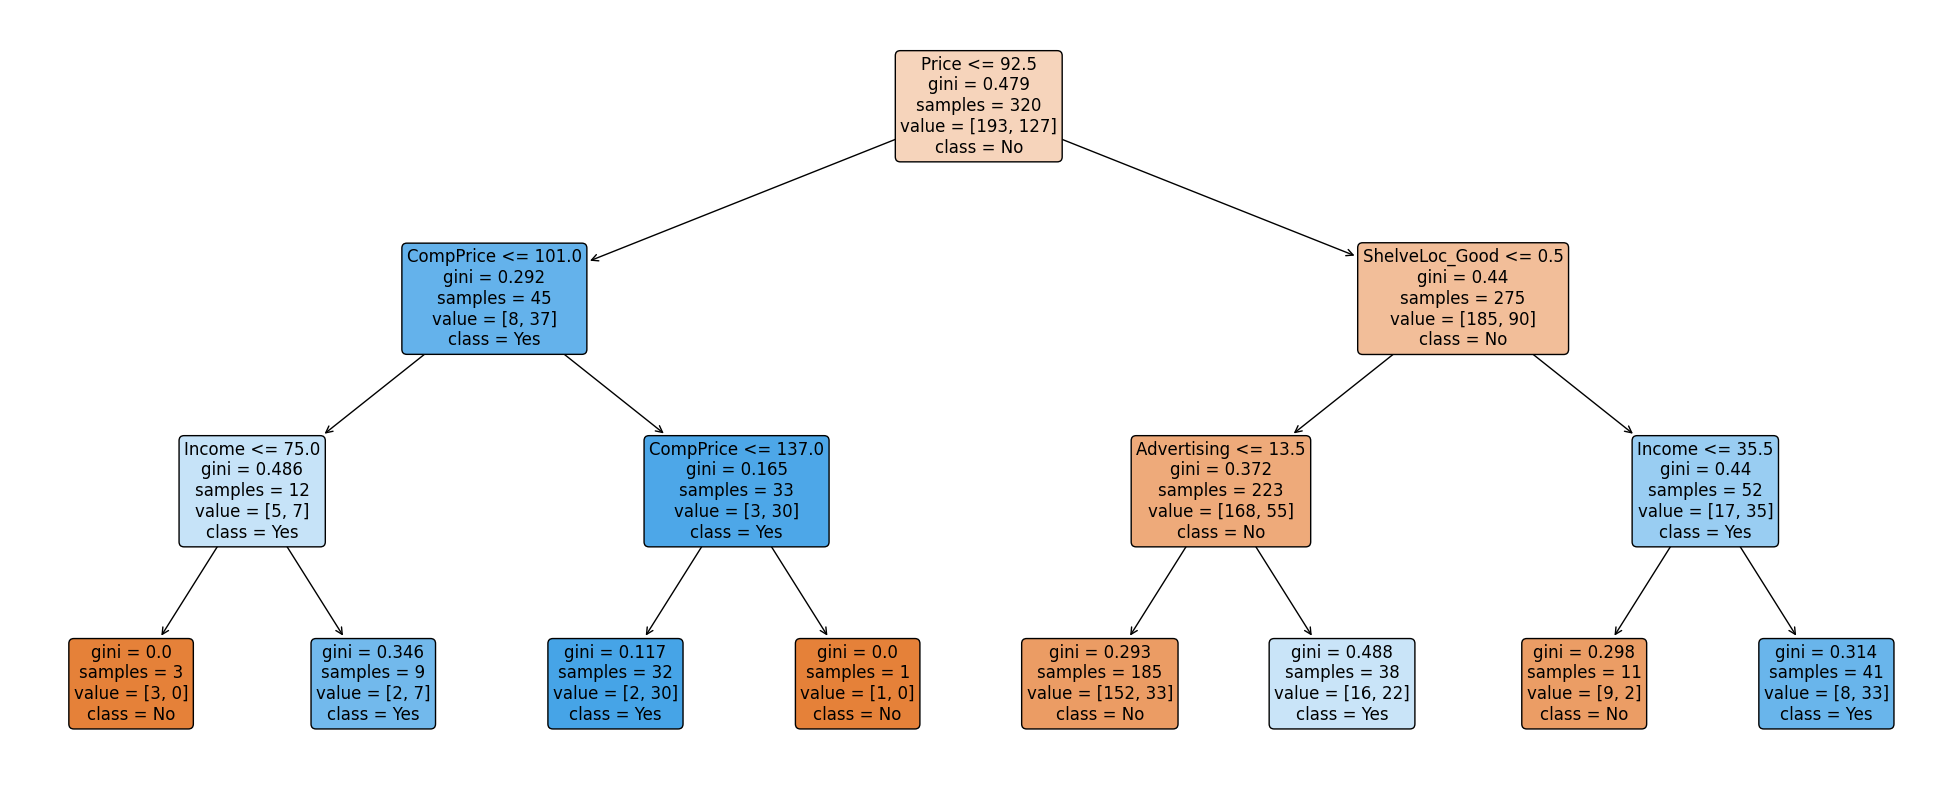

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming your trained model is stored in 'model' and you've used 'X_train' for training
plt.figure(figsize=(25, 10))  # Set a figure size large enough to accommodate the tree
plot_tree(model, 
          filled=True, 
          feature_names=X_encoded.columns, 
          class_names=['No', 'Yes'], 
          rounded=True, 
          proportion=False,  # Shows the absolute number instead of proportion
          fontsize=12)
plt.show()


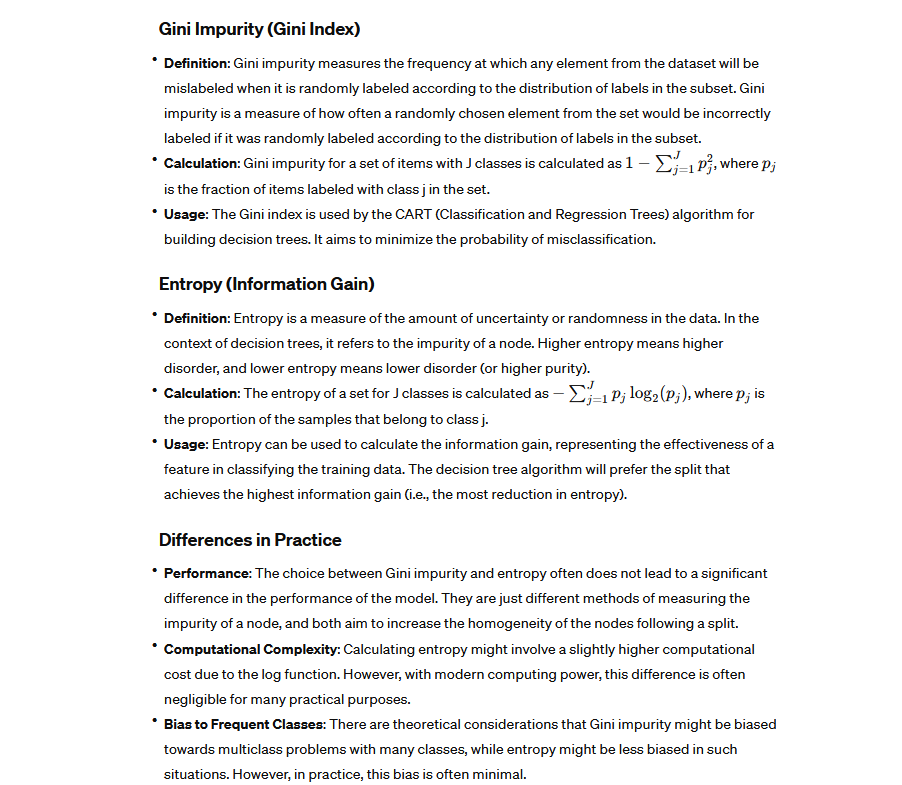

The most important indicator of `Sales` appears to be `ShelveLoc`.

We can see a text representation of the tree using
`export_text()`, which displays the split
criterion (e.g. `Price <= 92.5`) for each branch.
For leaf nodes it shows the overall prediction  
(`Yes` or `No`). 
 We can also see the number of observations in that
leaf that take on values of `Yes` and `No` by specifying  `show_weights=True`.

In [9]:
# print(export_text(clf,
#                   feature_names=feature_names,
#                   show_weights=True))


|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: Yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: Yes
|--- ShelveLoc[Good] >  0.50
|   |--- Price <= 135.00
|   |   |--- US[Yes] <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: Yes
|   |   |--- US[Yes] >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: Yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: Yes



In [40]:
from sklearn.tree import export_text

# Assuming 'model' is your trained DecisionTreeClassifier
# and 'X_encoded' contains your encoded feature names
feature_names = X_encoded.columns.tolist()

tree_text = export_text(model, feature_names=feature_names)
print(tree_text)


|--- Price <= 92.50
|   |--- CompPrice <= 101.00
|   |   |--- Income <= 75.00
|   |   |   |--- class: No
|   |   |--- Income >  75.00
|   |   |   |--- class: Yes
|   |--- CompPrice >  101.00
|   |   |--- CompPrice <= 137.00
|   |   |   |--- class: Yes
|   |   |--- CompPrice >  137.00
|   |   |   |--- class: No
|--- Price >  92.50
|   |--- ShelveLoc_Good <= 0.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- class: Yes
|   |--- ShelveLoc_Good >  0.50
|   |   |--- Income <= 35.50
|   |   |   |--- class: No
|   |   |--- Income >  35.50
|   |   |   |--- class: Yes



In order to properly evaluate the performance of a classification tree
on these data, we must estimate the test error rather than simply
computing the training error. We split the observations into a
training set and a test set, build the tree using the training set,
and evaluate its performance on the test data. This pattern is
similar to that in Chapter 6, with the linear models
replaced here by decision trees --- the code for validation
is almost identical. This approach leads to correct predictions
for 68.5% of the locations in the test data set.

In [10]:
# validation = skm.ShuffleSplit(n_splits=1,
#                               test_size=200,
#                               random_state=0)
# results = skm.cross_validate(clf,
#                              D,
#                              High,
#                              cv=validation)
# results['test_score']


array([0.685])

In [47]:
import sklearn.model_selection as skm
from sklearn.model_selection import cross_validate

#validation = skm.ShuffleSplit(n_splits=1, test_size=200, random_state=0)
validation = skm.ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

#results = skm.cross_validate(model, X_encoded, Y, cv=validation)
results = cross_validate(model, X_encoded, Y, cv=validation, return_train_score=True)

# Accessing the training and test scores
print("Training Score:", results['train_score']) # accuracy
print("Test Score:", results['test_score']) # # accuracy


Training Score: [0.778125]
Test Score: [0.7375]


Next, we consider whether pruning the tree might lead to improved
classification performance. We first split the data into a training and
test set. We will use cross-validation to prune the tree on the training
set, and then evaluate the performance of the pruned tree on the test
set.

In [11]:
# (X_train,
#  X_test,
#  High_train,
#  High_test) = skm.train_test_split(X,
#                                    High,
#                                    test_size=0.5,
#                                    random_state=0)
                                   

We first refit the full tree on the training set; here we do not set a `max_depth` parameter, since we will learn that through cross-validation.


In [12]:
# clf = DTC(criterion='entropy', random_state=0)
# clf.fit(X_train, High_train)
# accuracy_score(High_test, clf.predict(X_test))


0.735

In [56]:
# Noman

model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X_train, Y_train)

# Making predictions on both the training and test sets
Y_train_pred = model.predict(X_train)
# Calculating and printing performance metrics
print("Training Accuracy:", accuracy_score(Y_train, Y_train_pred))

Training Accuracy: 1.0


Next we use the `cost_complexity_pruning_path()` method of
`clf` to extract cost-complexity values. 

In [13]:
# ccp_path = model.cost_complexity_pruning_path(X_train, High_train)
# kfold = skm.KFold(10,
#                   random_state=1,
#                   shuffle=True)


In [65]:
# Noman

ccp_path = model.cost_complexity_pruning_path(X_train, Y_train)
kfold = skm.KFold(10, random_state=1, shuffle=True)
kfold

KFold(n_splits=10, random_state=1, shuffle=True)

This yields a set of impurities and $\alpha$ values
from which we can extract an optimal one by cross-validation.

In [14]:
# grid = skm.GridSearchCV(clf,
#                         {'ccp_alpha': ccp_path.ccp_alphas},
#                         refit=True,
#                         cv=kfold,
#                         scoring='accuracy')
# grid.fit(X_train, High_train)
# grid.best_score_


0.685

In [68]:
grid = skm.GridSearchCV(model, {'ccp_alpha': ccp_path.ccp_alphas}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_score_



0.74375

In [61]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.009991298620470584, criterion='entropy',
                       random_state=0)

Let’s take a look at the pruned true.

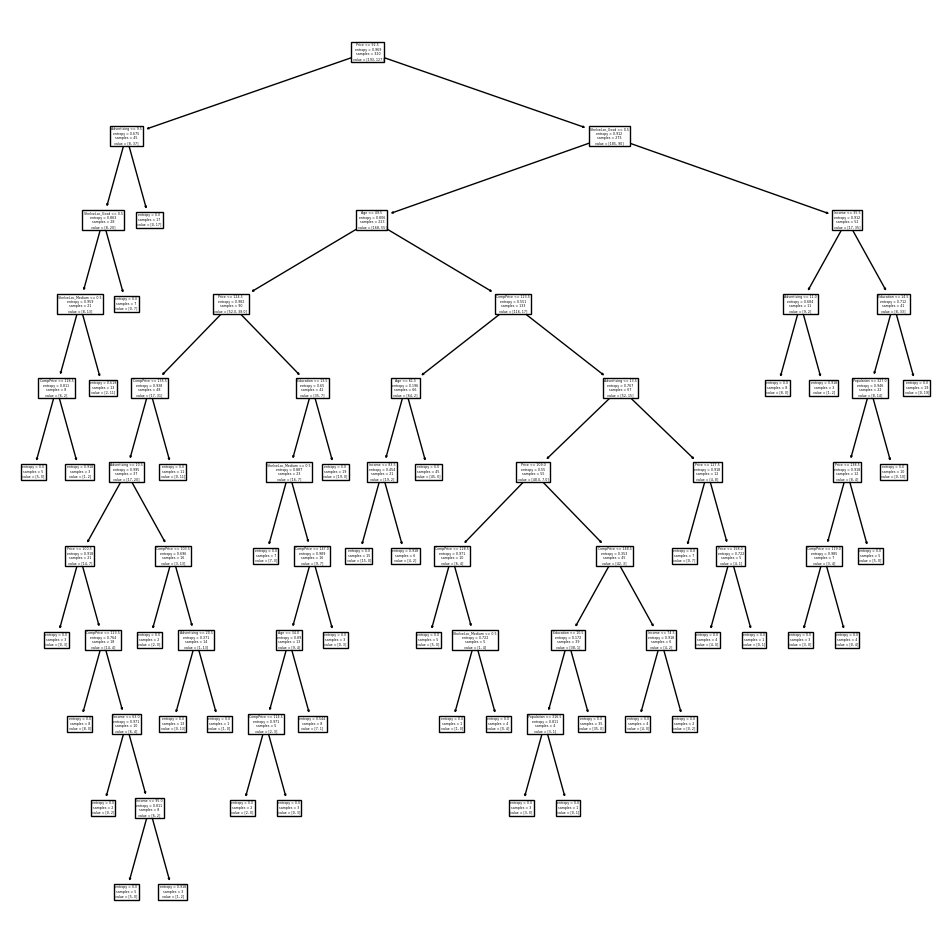

In [60]:
# ax = subplots(figsize=(12, 12))[1]
# best_ = grid.best_estimator_
# plot_tree(best_,
#           feature_names=feature_names,
#           ax=ax);


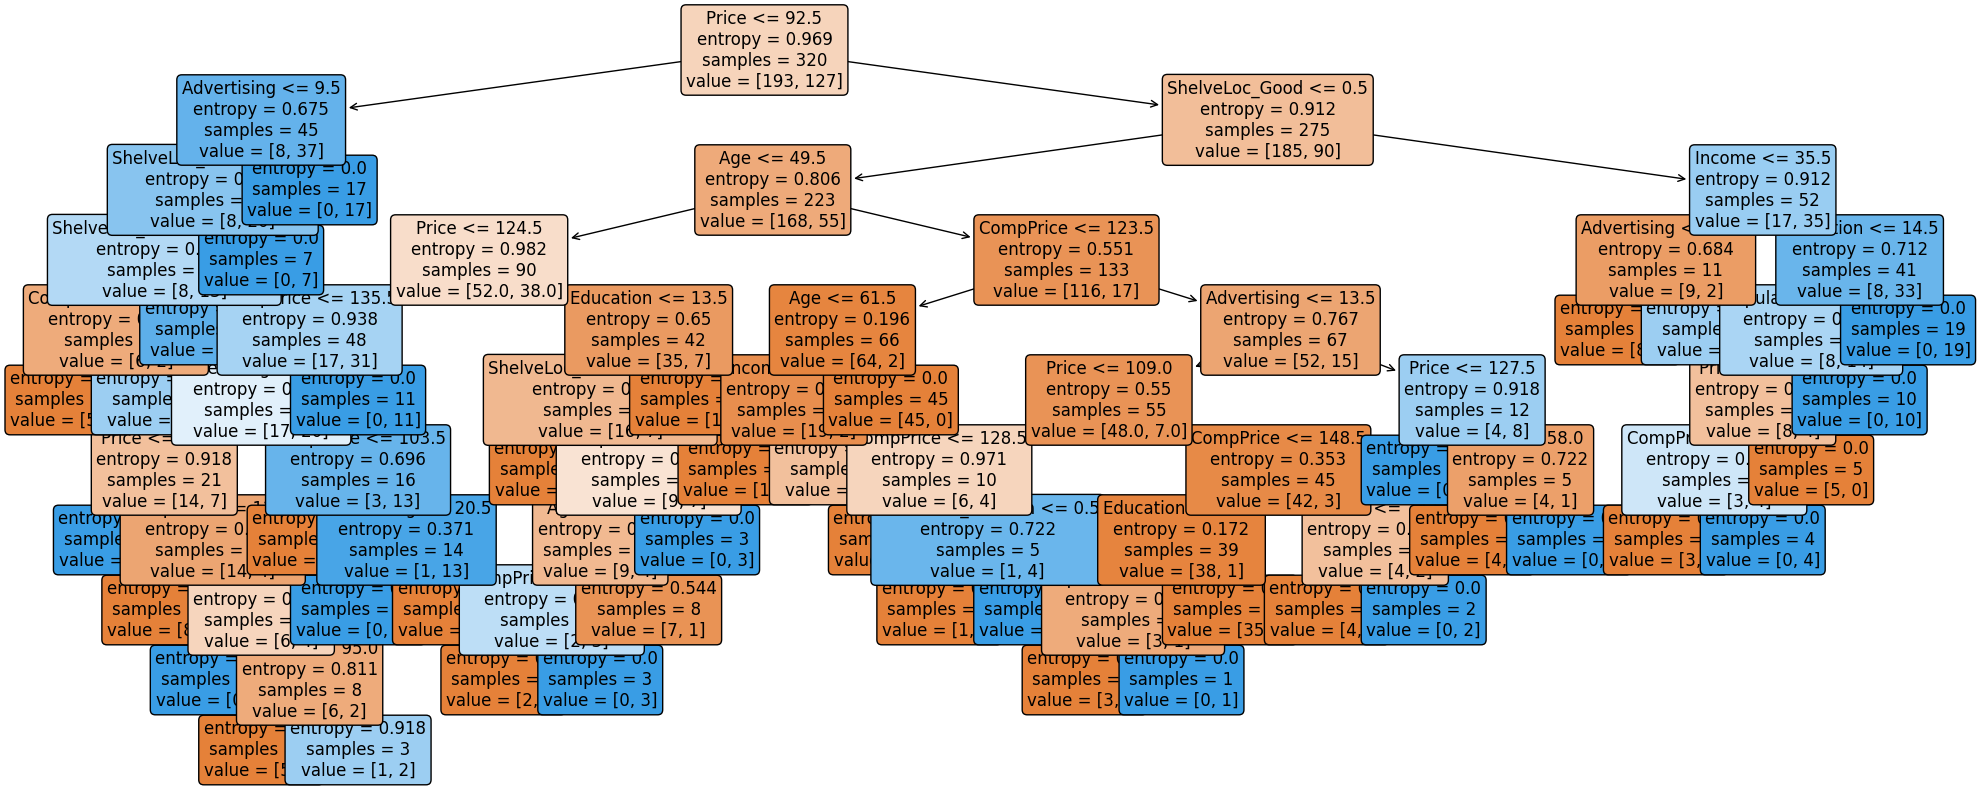

In [64]:
# Assuming your trained model is stored in 'model' and you've used 'X_train' for training
best_ = grid.best_estimator_
plt.figure(figsize=(25, 10))  # Set a figure size large enough to accommodate the tree
plot_tree(best_, 
          filled=True, 
          feature_names=X_encoded.columns, 
          #class_names=['No', 'Yes'], 
          rounded=True, 
          proportion=False,  # Shows the absolute number instead of proportion
          fontsize=12)
plt.show()

#plot_tree(best_,
#           feature_names=feature_names,
#           ax=ax);

This is quite a bushy tree. We could count the leaves, or query
`best_` instead.

In [69]:
best_.tree_.n_leaves


41

The tree with 30 terminal
nodes results in the lowest cross-validation error rate, with an accuracy of
68.5%. How well does this pruned tree perform on the test data set? Once
again, we apply the `predict()`  function.

In [70]:
print(accuracy_score(Y_test,
                     best_.predict(X_test)))
confusion_matrix(Y_test,
                 best_.predict(X_test))


0.7625


array([[33, 10],
       [ 9, 28]], dtype=int64)

Now 72.0% of the test observations are correctly classified, which is slightly worse than the error for the full tree (with 35 leaves). So cross-validation has not helped us much here; it only pruned off 5 leaves, at a cost of a slightly worse error. These results would change if we were to change the random number seeds above; even though cross-validation gives an unbiased approach to model selection, it does have variance.

  

## Fitting Regression Trees
Here we fit a regression tree to the  `Boston`  data set. The
steps are similar to those for classification trees.

In [18]:
# Boston = pd.read_csv('Boston.csv')
# model = MS(Boston.columns.drop('medv'), intercept=False)
# D = model.fit_transform(Boston)
# feature_names = list(D.columns)
# X = np.asarray(D)


In [71]:
Boston = pd.read_csv('Boston.csv')

In [72]:
# Check for missing values in each column
missing_values = Boston.isnull().sum()
print(missing_values)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      5
medv       0
dtype: int64


In [73]:
# Fill missing numerical values with the mean
Boston['lstat'] = Boston['lstat'].fillna(Boston['lstat'].mean())

First, we split the data into training and test sets, and fit the tree
to the training data. Here we use 30% of the data for the test set.


In [19]:
# (X_train,
#  X_test,
#  y_train,
#  y_test) = skm.train_test_split(X,
#                                 Boston['medv'],
#                                 test_size=0.3,
#                                 random_state=0)


Having formed  our training  and test data sets, we fit the regression tree.

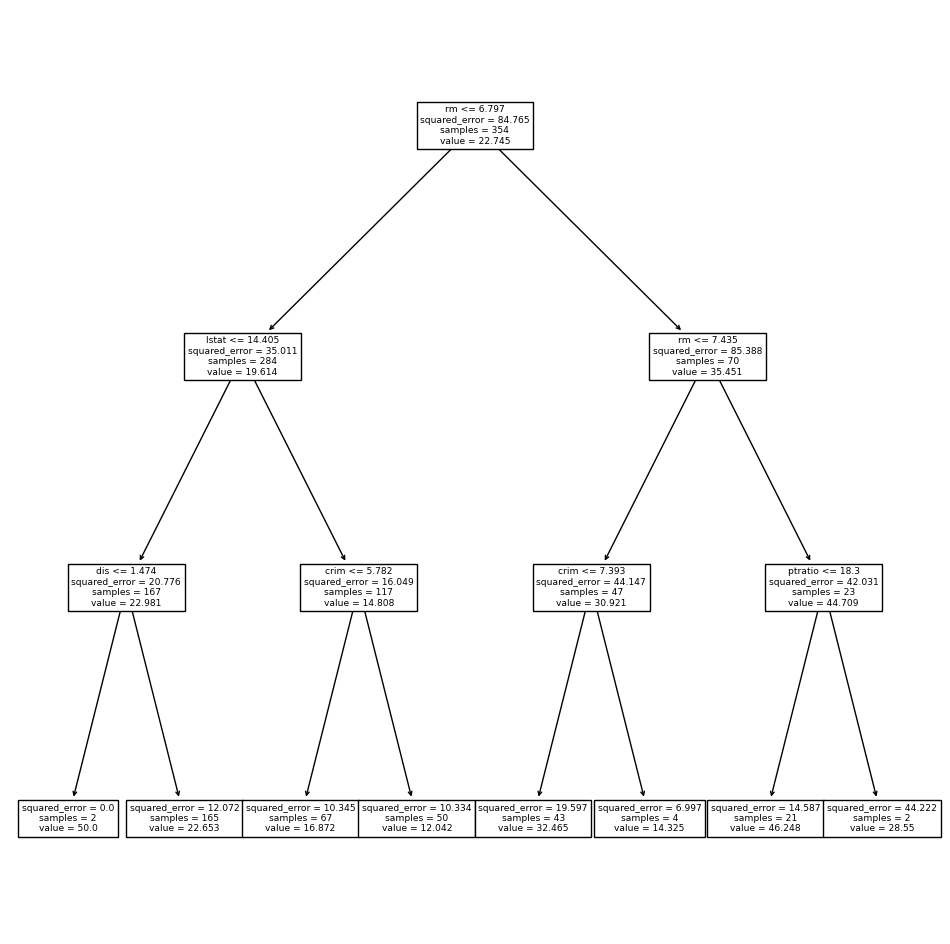

In [20]:
# reg = DTR(max_depth=3)
# reg.fit(X_train, y_train)
# ax = subplots(figsize=(12,12))[1]
# plot_tree(reg,
#           feature_names=feature_names,
#           ax=ax);


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Regression Tree - Training MSE: 16.078865042107658, Test MSE: 13.485824864233363
Regression Tree - Training R^2: 0.8149161385108782, Test R^2: 0.8161035162368409


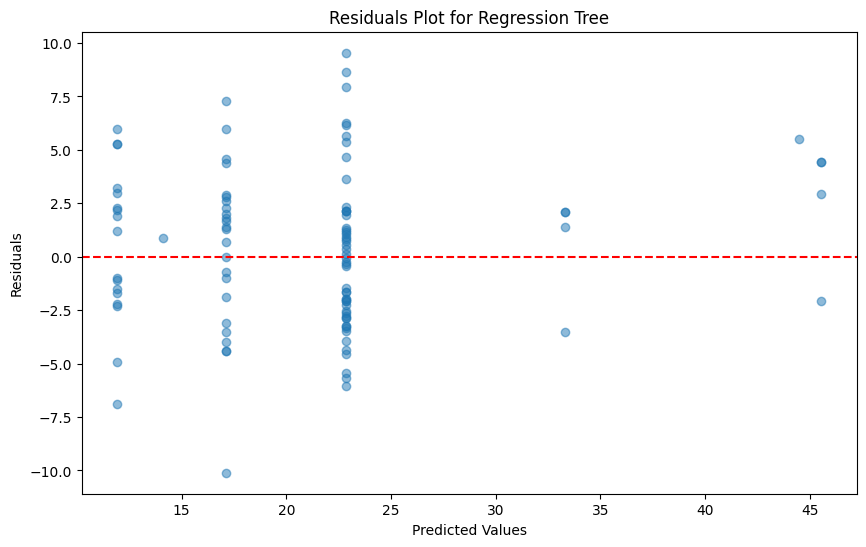

In [76]:
# Assuming Boston is your DataFrame and 'medv' is the target variable

# Prepare data
X = Boston.drop('medv', axis=1)  # Use all other columns as predictors
Y = Boston['medv']

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the regression tree model on the training set
model = DecisionTreeRegressor(max_depth = 3, random_state=42)
model.fit(X_train, Y_train)

# Evaluate the model
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Calculate and print MSE and R^2 for both training and test sets
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f'Regression Tree - Training MSE: {mse_train}, Test MSE: {mse_test}')
print(f'Regression Tree - Training R^2: {r2_train}, Test R^2: {r2_test}')

# Plotting residuals for the regression tree model
residuals = Y_test - Y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(Y_test_pred, residuals, alpha=0.5)
plt.title('Residuals Plot for Regression Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


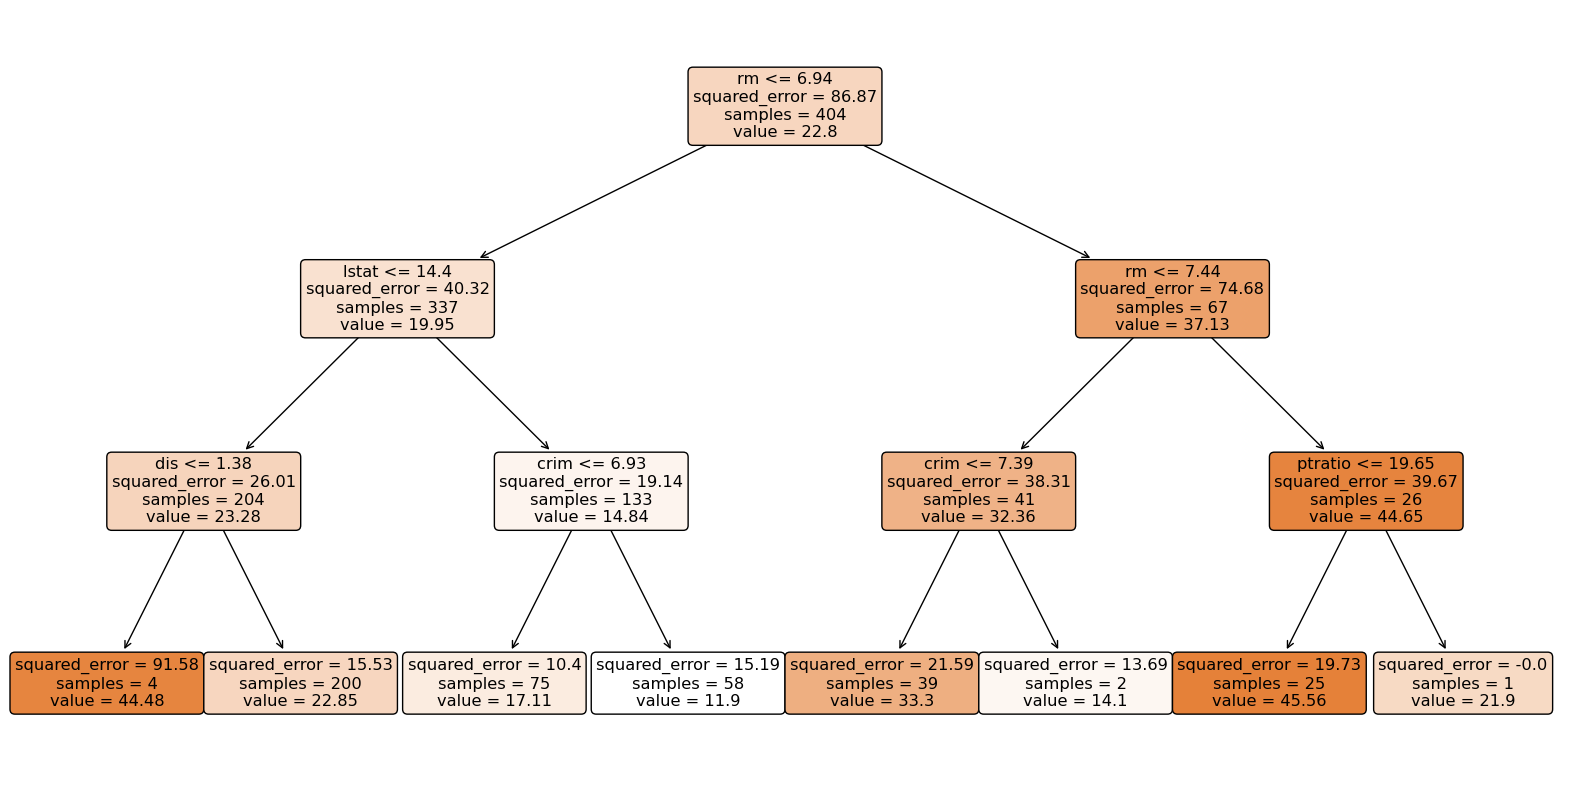

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'model' is your trained DecisionTreeRegressor
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed for clarity
plot_tree(model, 
          filled=True, 
          feature_names=X.columns, 
          rounded=True, 
          max_depth=3,  # Optional: Set a max_depth for larger trees
          precision=2,
          proportion=False)
plt.show()


The variable `lstat` measures the percentage of individuals with
lower socioeconomic status. The tree indicates that lower
values of `lstat` correspond to more expensive houses.
The tree predicts a median house price of $12,042 for small-sized homes (`rm < 6.8`), in
suburbs in which residents have low socioeconomic status (`lstat  > 14.4`) and the crime-rate is moderate (`crim > 5.8`).

Now we use the cross-validation function to see whether pruning
the tree will improve performance.

In [21]:
# ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
# kfold = skm.KFold(5,
#                   shuffle=True,
#                   random_state=10)
# grid = skm.GridSearchCV(reg,
#                         {'ccp_alpha': ccp_path.ccp_alphas},
#                         refit=True,
#                         cv=kfold,
#                         scoring='neg_mean_squared_error')
# G = grid.fit(X_train, y_train)


In [85]:
ccp_path = model.cost_complexity_pruning_path(X_train, Y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(model,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=3, random_state=42),
             param_grid={'ccp_alpha': array([ 0.        ,  1.33233911,  1.73592852,  2.190674  ,  4.53763969,
        5.94515856, 14.19935239, 40.85344652])},
             scoring='neg_mean_squared_error')

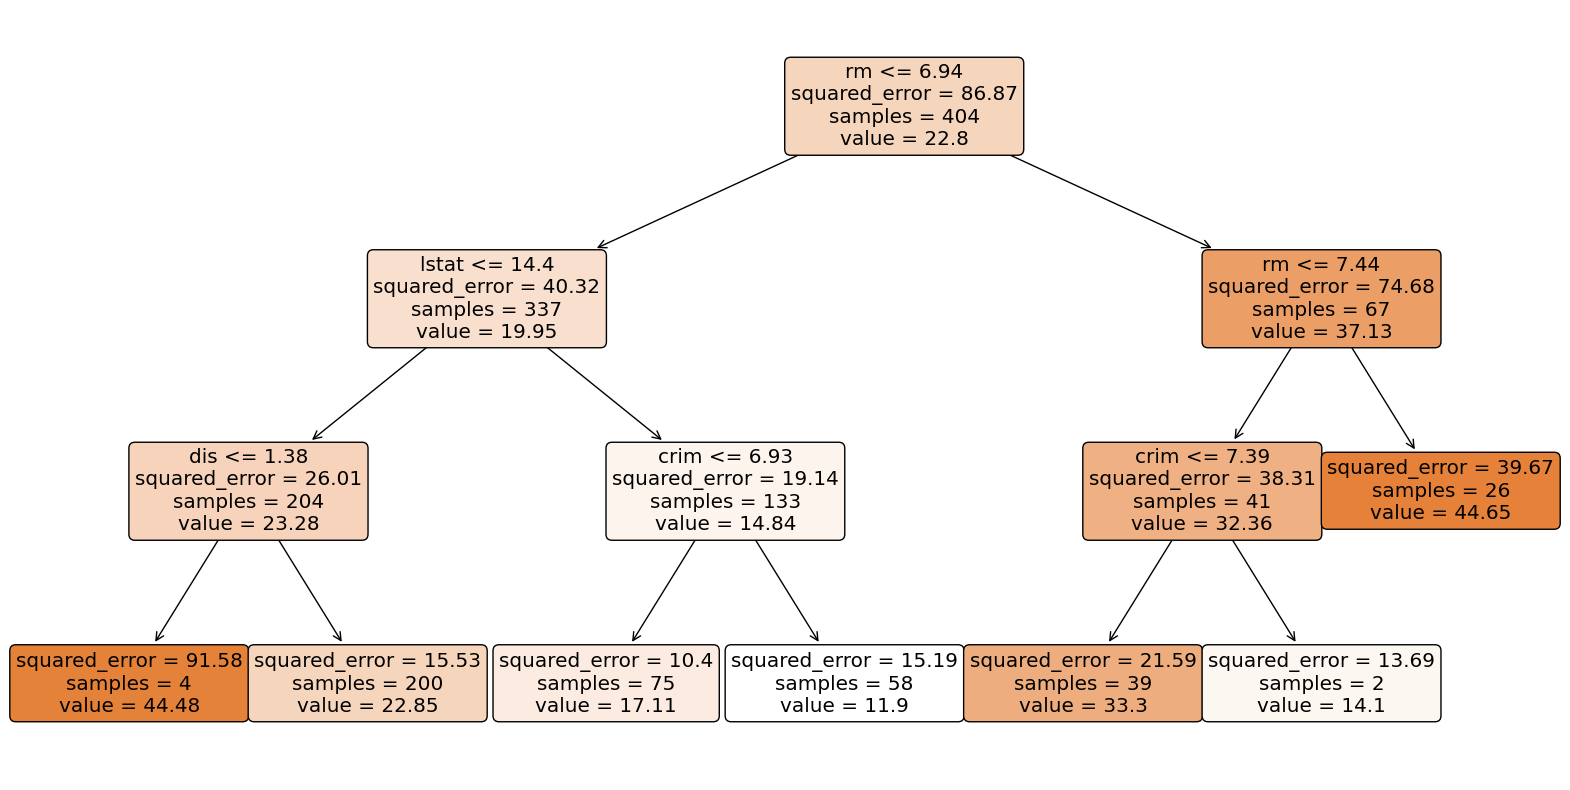

In [88]:
# Extracting the best estimator from the grid search object
best_tree_model = grid.best_estimator_
# Assuming 'model' is your trained DecisionTreeRegressor
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed for clarity
plot_tree(best_tree_model, 
          filled=True, 
          feature_names=X.columns, 
          rounded=True, 
          precision=2,
          proportion=False
          )
plt.show()


In keeping with the cross-validation results, we use the pruned tree
to make predictions on the test set.

In [22]:
# best_ = grid.best_estimator_
# np.mean((y_test - best_.predict(X_test))**2)


28.06985754975404

In [89]:
best_ = grid.best_estimator_
np.mean((Y_test - best_.predict(X_test))**2)


13.692448393645133

In other words, the test set MSE associated with the regression tree
is 28.07.  The square root of
the MSE is therefore around
5.30,
indicating that this model leads to test predictions that are within around
$5300
of the true median home value for the suburb.

Let’s plot the best tree to see how interpretable it is.

In [91]:
# ax = subplots(figsize=(12,12))[1]
# plot_tree(G.best_estimator_,
#           feature_names=feature_names,
#           ax=ax);


## Bagging and Random Forests

Here we apply bagging and random forests to the `Boston` data, using
the `RandomForestRegressor()` from the `sklearn.ensemble` package. Recall
that bagging is simply a special case of a random forest with
$m=p$. Therefore, the `RandomForestRegressor()`  function can be used to
perform both bagging and random forests. We start with bagging.

In [24]:
# bag_boston = RF(max_features=X_train.shape[1], random_state=0)
# bag_boston.fit(X_train, y_train)


RandomForestRegressor(max_features=12, random_state=0)

In [94]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Create a bagging regressor model
# DecisionTreeRegressor is the default base estimator, so we don't need to specify it explicitly
bagging_model = BaggingRegressor(
    #base_estimator=DecisionTreeRegressor(),  # This is the default but is shown here for clarity
    n_estimators=100,  # Number of trees to use in the ensemble
    max_features=X_train.shape[1],  # Use all features for each base estimator (like RandomForest)
    random_state=0,
    n_jobs=-1  # Use all available CPUs
)



In [95]:

# Fit the bagging regressor model on the training data
bagging_model.fit(X_train, Y_train)

# Predict on both the training and test sets
Y_train_pred_bagging = bagging_model.predict(X_train)
Y_test_pred_bagging = bagging_model.predict(X_test)

# Calculate and print the MSE and R^2 for both
mse_train_bagging = mean_squared_error(Y_train, Y_train_pred_bagging)
mse_test_bagging = mean_squared_error(Y_test, Y_test_pred_bagging)
r2_train_bagging = r2_score(Y_train, Y_train_pred_bagging)
r2_test_bagging = r2_score(Y_test, Y_test_pred_bagging)

print(f'Bagging - Training MSE: {mse_train_bagging}, Test MSE: {mse_test_bagging}')
print(f'Bagging - Training R^2: {r2_train_bagging}, Test R^2: {r2_test_bagging}')

Bagging - Training MSE: 2.2099623316831685, Test MSE: 9.027426892156866
Bagging - Training R^2: 0.9745611172789713, Test R^2: 0.8768994792969971


The argument `max_features` indicates that all 12 predictors should
be considered for each split of the tree --- in other words, that
bagging should be done.  How well does this bagged model perform on
the test set?

14.634700151315787

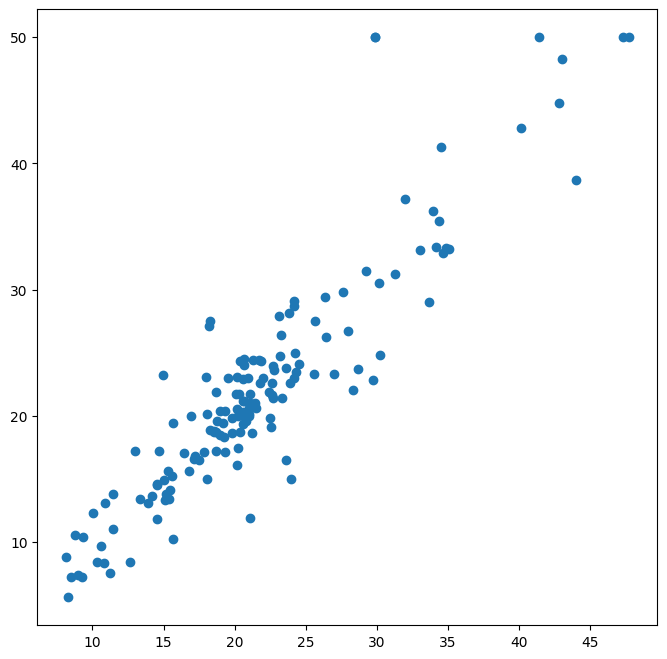

In [25]:
# ax = subplots(figsize=(8,8))[1]
# y_hat_bag = bag_boston.predict(X_test)
# ax.scatter(y_hat_bag, y_test)
# np.mean((y_test - y_hat_bag)**2)


9.027426892156866

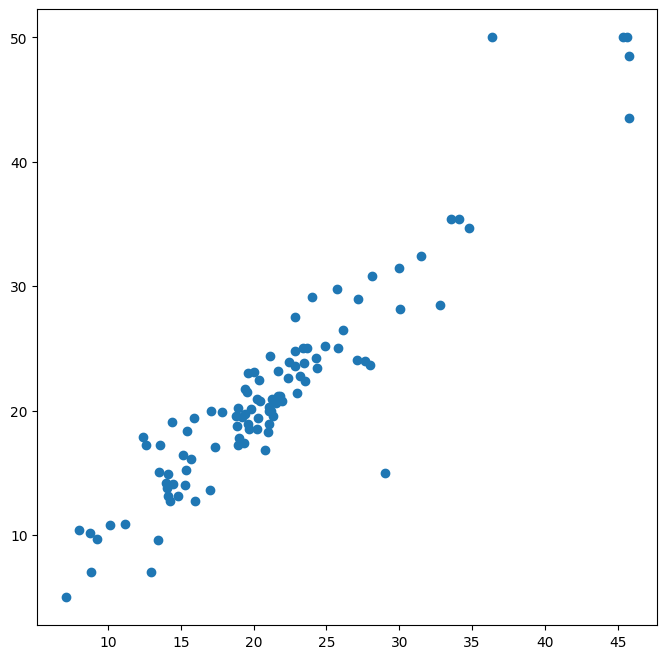

In [96]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bagging_model.predict(X_test)
ax.scatter(y_hat_bag, Y_test)
np.mean((Y_test - y_hat_bag)**2)


The test set MSE associated with the bagged regression tree is
14.63, about half that obtained using an optimally-pruned single
tree.  We could change the number of trees grown from the default of
100 by
using the `n_estimators` argument:

In [26]:
# bag_boston = RF(max_features=X_train.shape[1],
#                 n_estimators=500,
#                 random_state=0).fit(X_train, y_train)
# y_hat_bag = bag_boston.predict(X_test)
# np.mean((y_test - y_hat_bag)**2)

14.605662565263161

In [101]:
# Create a bagging regressor model
# DecisionTreeRegressor is the default base estimator, so we don't need to specify it explicitly
bagging_model = BaggingRegressor(
    #base_estimator=DecisionTreeRegressor(),  # This is the default but is shown here for clarity
    n_estimators=500,  # Number of trees to use in the ensemble
    max_features=X_train.shape[1],  # Use all features for each base estimator (like RandomForest)
    random_state=0,
    n_jobs=-1  # Use all available CPUs
)

bagging_model.fit(X_train, Y_train)

BaggingRegressor(max_features=12, n_estimators=500, n_jobs=-1, random_state=0)

8.129597603921566

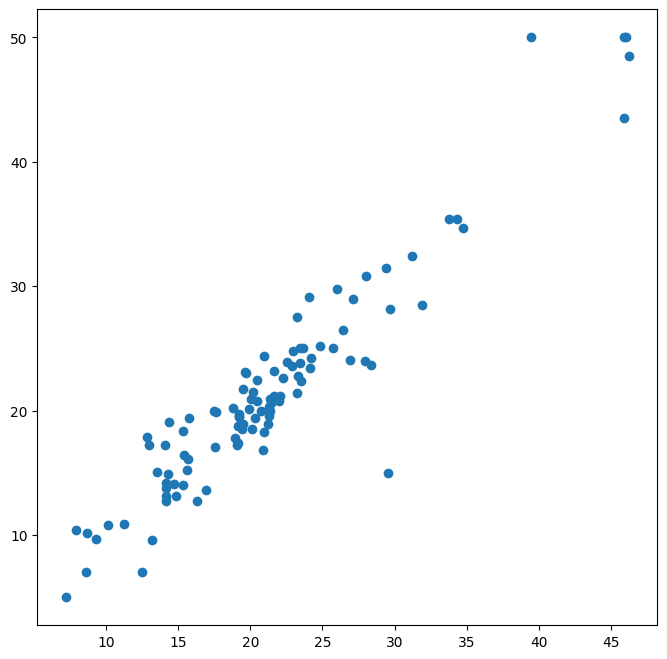

In [102]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bagging_model.predict(X_test)
ax.scatter(y_hat_bag, Y_test)
np.mean((Y_test - y_hat_bag)**2)

There is not much change. Bagging and random forests cannot overfit by
increasing the number of trees, but can underfit if the number is too small.

Growing a random forest proceeds in exactly the same way, except that
we use a smaller value of the `max_features` argument. By default,
`RandomForestRegressor()`  uses $p$ variables when building a random
forest of regression trees (i.e. it defaults to bagging), and `RandomForestClassifier()` uses
$\sqrt{p}$ variables when building a
random forest of classification trees. Here we use `max_features=6`.

In [27]:
# RF_boston = RF(max_features=6,
#                random_state=0).fit(X_train, y_train)
# y_hat_RF = RF_boston.predict(X_test)
# np.mean((y_test - y_hat_RF)**2)


20.04276446710527

In [106]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor model
# DecisionTreeRegressor is the default base estimator, so we don't need to specify it explicitly

# Initialize the Random Forest regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42, max_features= 6)


random_forest.fit(X_train, Y_train)

RandomForestRegressor(max_features=6, random_state=42)

8.782419578431373

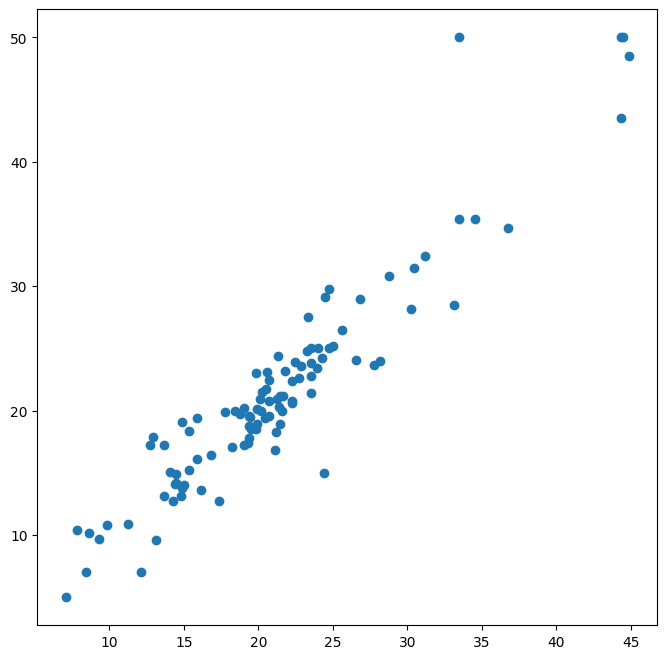

In [107]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = random_forest.predict(X_test)
ax.scatter(y_hat_bag, Y_test)
np.mean((Y_test - y_hat_bag)**2)

The test set MSE is 20.04;
this indicates that random forests did somewhat worse than bagging
in this case. Extracting the `feature_importances_` values from the fitted model, we can view the
importance of each variable.

In [28]:
# feature_imp = pd.DataFrame(
#     {'importance':RF_boston.feature_importances_},
#     index=feature_names)
# feature_imp.sort_values(by='importance', ascending=False)

importance
lstat      0.356203
rm         0.332163
ptratio    0.067270
crim       0.055404
indus      0.053851
dis        0.041582
nox        0.035225
tax        0.025355
age        0.021506
rad        0.004784
chas       0.004203
zn         0.002454

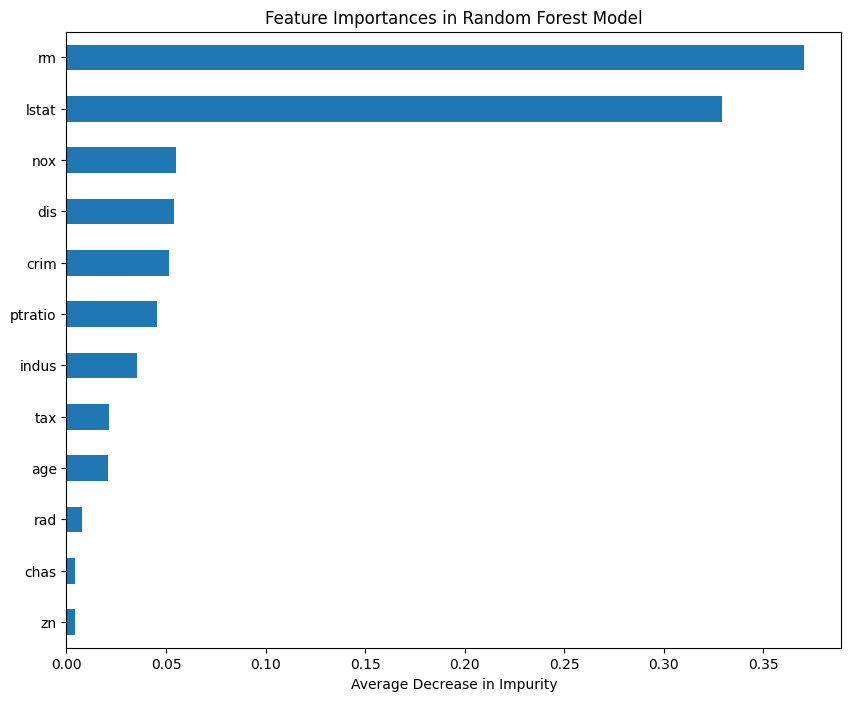

In [109]:

# Assuming `random_forest` is your trained RandomForestRegressor model
# And `X` is the DataFrame containing your features

# Get feature importances from the model
feature_importances = random_forest.feature_importances_

# Create a pandas series to make plotting easier, using the feature names as the index
importances_series = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances for better visualization
importances_sorted = importances_series.sort_values()

# Plotting
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Average Decrease in Impurity')
plt.show()


 This
is a relative measure of the total decrease in node impurity that results from
splits over that variable, averaged over all trees (this was plotted in Figure 8.9 for a model fit to the `Heart` data). 

The results indicate that across all of the trees considered in the
random forest, the wealth level of the community (`lstat`) and the
house size (`rm`) are by far the two most important variables.

  

## Boosting

Here we use `GradientBoostingRegressor()` from `sklearn.ensemble`
to fit boosted regression trees to the `Boston` data
set. For classification we would  use `GradientBoostingClassifier()`.
The argument `n_estimators=5000`
indicates that we want 5000 trees, and the option
`max_depth=3` limits the depth of each tree. The
argument `learning_rate` is the $\lambda$
mentioned earlier in the description of boosting.

In [29]:
# boost_boston = GBR(n_estimators=5000,
#                    learning_rate=0.001,
#                    max_depth=3,
#                    random_state=0)
# boost_boston.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming X_train, y_train, X_test, and y_test are already defined

# Initialize the Gradient Boosting Regressor model
boost_boston = GradientBoostingRegressor(n_estimators=5000,
                                         learning_rate=0.001,
                                         max_depth=3,
                                         random_state=0)

# Fit the model on the training data
boost_boston.fit(X_train, Y_train)

# Make predictions on the training and testing sets
y_train_pred = boost_boston.predict(X_train)
y_test_pred = boost_boston.predict(X_test)

# Calculate and print MSE and R^2 for both training and testing sets
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)

print(f'Gradient Boosting - Training MSE: {mse_train}, Test MSE: {mse_test}')
print(f'Gradient Boosting - Training R^2: {r2_train}, Test R^2: {r2_test}')


Gradient Boosting - Training MSE: 3.618211700558018, Test MSE: 7.76661565392907
Gradient Boosting - Training R^2: 0.9583507547659211, Test R^2: 0.8940922543577272


We can see how the training error decreases with the `train_score_` attribute.
To get an idea of how the test error decreases we can use the
`staged_predict()` method to get the predicted values along the path.

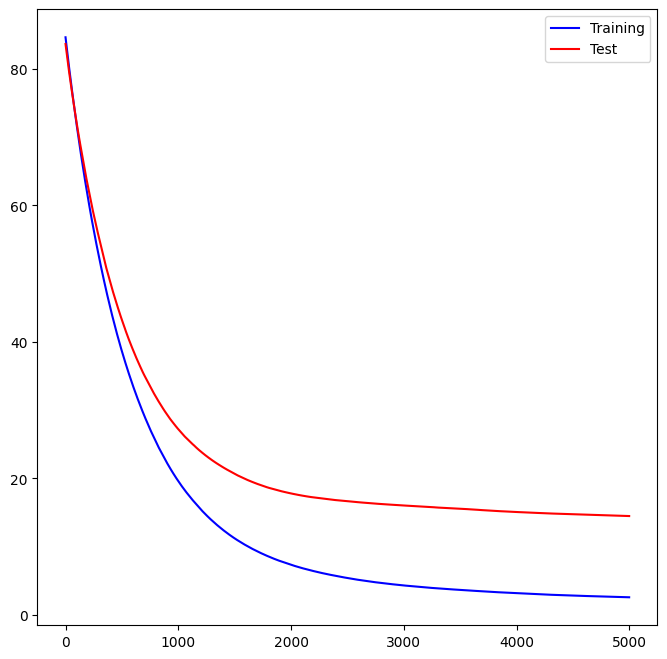

In [30]:
# test_error = np.zeros_like(boost_boston.train_score_)
# for idx, y_ in enumerate(boost_boston.staged_predict(X_test)):
#    test_error[idx] = np.mean((y_test - y_)**2)

# plot_idx = np.arange(boost_boston.train_score_.shape[0])
# ax = subplots(figsize=(8,8))[1]
# ax.plot(plot_idx,
#         boost_boston.train_score_,
#         'b',
#         label='Training')
# ax.plot(plot_idx,
#         test_error,
#         'r',
#         label='Test')
# ax.legend();


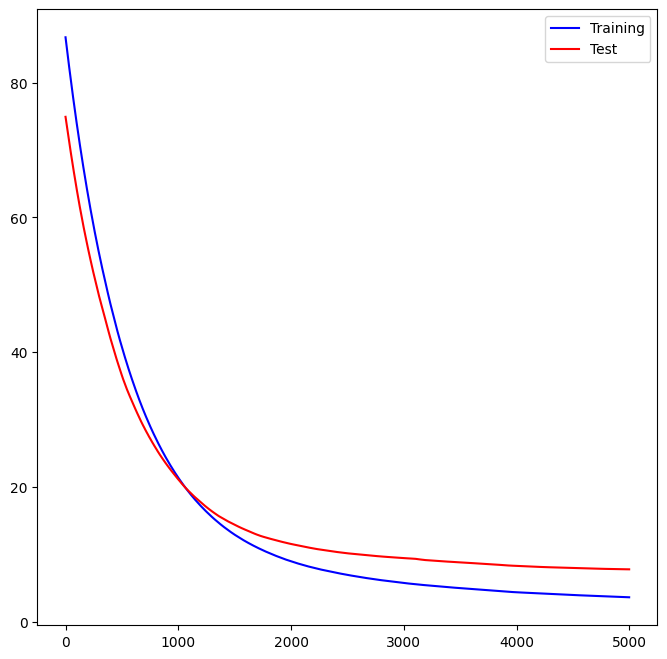

In [111]:
test_error = np.zeros_like(boost_boston.train_score_)
for idx, y_ in enumerate(boost_boston.staged_predict(X_test)):
   test_error[idx] = np.mean((Y_test - y_)**2)

plot_idx = np.arange(boost_boston.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_boston.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();


We now use the boosted model to predict `medv` on the test set:

In [112]:
y_hat_boost = boost_boston.predict(X_test);
np.mean((Y_test - y_hat_boost)**2)


7.76661565392907

 The test MSE obtained is 14.48,
similar to the test MSE for bagging. If we want to, we can
perform boosting with a different value of the shrinkage parameter
$\lambda$ in  (8.10). The default value is 0.001, but
this is easily modified.  Here we take $\lambda=0.2$.

In [32]:
# boost_boston = GBR(n_estimators=5000,
#                    learning_rate=0.2,
#                    max_depth=3,
#                    random_state=0)
# boost_boston.fit(X_train,
#                  y_train)
# y_hat_boost = boost_boston.predict(X_test);
# np.mean((y_test - y_hat_boost)**2)


14.501514553719565

In [113]:
# Initialize the Gradient Boosting Regressor model
boost_boston = GradientBoostingRegressor(n_estimators=5000,
                                         learning_rate=0.2,
                                         max_depth=3,
                                         random_state=0)

# Fit the model on the training data
boost_boston.fit(X_train, Y_train)

# Make predictions on the training and testing sets
y_train_pred = boost_boston.predict(X_train)
y_test_pred = boost_boston.predict(X_test)

# Calculate and print MSE and R^2 for both training and testing sets
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)

print(f'Gradient Boosting - Training MSE: {mse_train}, Test MSE: {mse_test}')
print(f'Gradient Boosting - Training R^2: {r2_train}, Test R^2: {r2_test}')

Gradient Boosting - Training MSE: 2.2200451725710347e-16, Test MSE: 6.5054004573304125
Gradient Boosting - Training R^2: 1.0, Test R^2: 0.9112905379079074


In this case, using $\lambda=0.2$ leads to a almost the same test MSE
as when using $\lambda=0.001$.

 

## Bayesian Additive Regression Trees

In this section we demonstrate a  `Python` implementation of BART found in the
`ISLP.bart` package. We fit a  model
to the `Boston` housing data set. This `BART()` estimator is
designed for quantitative outcome variables, though other implementations are available for
fitting logistic and probit models to categorical outcomes.

In [33]:
bart_boston = BART(random_state=0, burnin=5, ndraw=15)
bart_boston.fit(X_train, y_train)


BART(burnin=5, ndraw=15, random_state=0)

On this data set, with this split into test and training, we see that the test error of BART is similar to that of  random forest.

In [34]:
yhat_test = bart_boston.predict(X_test.astype(np.float32))
np.mean((y_test - yhat_test)**2)


20.739185417498764

We can check how many times each variable appeared in the collection of trees.
This gives a summary similar to the variable importance plot for boosting and random forests.

In [35]:
var_inclusion = pd.Series(bart_boston.variable_inclusion_.mean(0),
                               index=D.columns)
var_inclusion


crim       25.466667
zn         30.600000
indus      24.933333
chas       21.133333
nox        27.333333
rm         28.800000
age        23.466667
dis        26.000000
rad        25.000000
tax        21.733333
ptratio    26.800000
lstat      31.866667
dtype: float64